# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

### For comparison, Black-Scholes analytic solution:

In [10]:
import scipy
from scipy.special import erf
import numpy
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


# <span style="color:blue"> Svolgimento </span>

Le European Options sono le più semplici tra le operazioni finanziarie che rientrano nella categoria delle options. Esse non sono altro che un contratto tra due parti, nel quale il writer vende a un compratore, l'holder, un diritto. Il fine di questo contratto è di tutelarsi in previsione di un ipotetico periodo di crisi. Il contratto si può distinguere in: 

1. Call-option: l'holder compra oggi al tempo t ad un prezzo $C(t)$ il diritto di comprare in futuro un bene ad un prezzo concordato $K$. In questo caso, l'holder, quando decidera' di esercitare il proprio diritto ad un tempo $T$, avra' un profitto pari a $S(T)-K$ se $K<S(T)$.

2. Put-option:  in questo caso l'holder compra ad un prezzo $P(t)$ il diritto di rivendere ad un prezzo $K$, in questo caso il profitto sarà $K-S(T)$ se $K>S(T)$.

In entrambi i casi, per calcolare l'effettivo guadagno al tempo $T$, che corrisponderà al prezzo a cui si vuole comprare oggi l'opzione per non risentire delle fluttuazioni del mercato; bisognera' scontare il profitto di un fattore $e^{-rT}$, corrispondente al termine di interesse composto applicato dalla banca.

Il metodo di Black-Scholes, basato sull'ipotesi che l'andamento segua un moto browniano geometrico, vuole stimare il valore economico del bene $S(t)$. Nel dettaglio, si ha che $S(t)$ è descritto dal processo stocastico:
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$

Dove $( \mu-\frac{1}{2}\sigma^2 )t$ rappresenta il contributo deterministico dell'evoluzione temporale del valore del bene, $\mu$ è il rendimento medio annuo (crescita media del prezzo dell'asset) e $\sigma$ è la volatilità (fluttuazione statistica del prezzo di mercato). Il termine $\sigma W(t)$ esprime il fatto che il processo sia Markoviano, in particolare è un termine Browniano quindi  $W(t)\sim\mathcal{N}(0,t)$.

Grazie al fatto che il moto sia Markoviano, e quindi indipendete dalla storia del processo e pertanto dipendete solo dagli intervalli di tempo $\Delta t$, il processo puo' essere discretizzato in intervalli di tempo $t_i$ nella seguente forma:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    
Con $Z_i \sim \mathcal{N}(0,1)$. L'andamento di $S(t)$ può essere quindi stimato mediante tecniche monte carlo, nella simulazione effettuata si è fatta una media a blocchi di $M=10^4$ e $N=100$ dei valori di $C(0)$ e $P(0)$. Nel caso discreto si è diviso l'intervallo $(0,T)$ in 100 passi.

Infine si confronta l'esito della simulazione con la soluzione analitica di Black-Scholes.


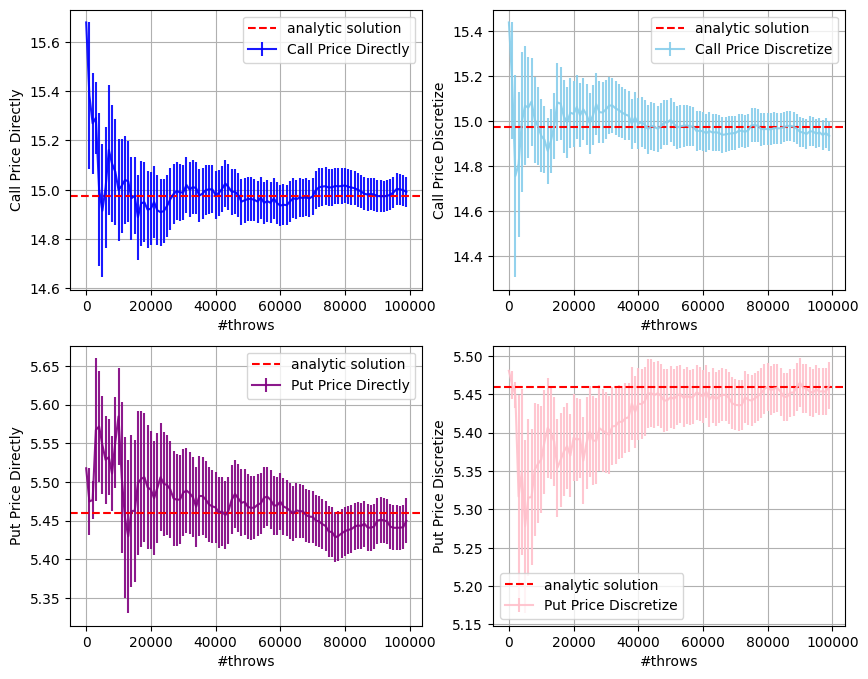

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.stats import norm             #libreria per il fit
from scipy.optimize import curve_fit

# Parameters
M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

call = 14.975790778311286
put = 5.4595325819072364

def leggi_dati_da_file(file_path):
    dati = []  # List to store objects with numerical data

    try:
        with open(file_path, 'r') as file:
            for line in file:
                # Each line of the file contains 4 values
                valori = line.split()
                if len(valori) == 8:
                    dato1 = float(valori[0])
                    dato2 = float(valori[1])
                    dato3 = float(valori[2])
                    dato4 = float(valori[3])
                    dato5 = float(valori[4])
                    dato6 = float(valori[5])
                    dato7 = float(valori[6])
                    dato8 = float(valori[7])
                    dati.append((dato1, dato2, dato3, dato4, dato5, dato6, dato7, dato8))
                else:
                    print(f"Ignorata la riga con formato non valido: {line.strip()}")
    except FileNotFoundError:
        print(f"File '{file_path}' non trovato.")
    except ValueError:
        print(f"Errore nella conversione di un valore in '{file_path}'.")

    return dati

# Example usage
file_da_leggere = 'output_dati.txt' 
dati_letti = leggi_dati_da_file(file_da_leggere)

x = np.arange(len(dati_letti))  #Ottieni stessi risultati mettendo però in evidenza il numero di blocchi N
x*=L 

# Extract data for plots
muC = [item[0] for item in dati_letti]
errC = [item[1] for item in dati_letti]

muP = [item[2] for item in dati_letti]
errP = [item[3] for item in dati_letti]

muc = [item[4] for item in dati_letti]
errc = [item[5] for item in dati_letti]

mup = [item[6] for item in dati_letti]
errp = [item[7] for item in dati_letti]


# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot C Directly
axs[0, 0].errorbar(x, muC, yerr=errC,label='Call Price Directly', color='blue', alpha=0.9)
axs[0, 0].set(xlabel='#throws', ylabel='Call Price Directly')
axs[0, 0].axhline(call, color='red', linestyle='--', label="analytic solution") 
axs[0, 0].grid(True)
axs[0, 0].legend()

# Plot C Discretize
axs[0, 1].errorbar(x, muc, yerr=errc,label='Call Price Discretize', color='skyblue', alpha=0.9)
axs[0, 1].set(xlabel='#throws', ylabel='Call Price Discretize')
axs[0, 1].axhline(call, color='red', linestyle='--', label="analytic solution") 
axs[0, 1].grid(True)
axs[0, 1].legend()

# Plot P Directly
axs[1, 0].errorbar(x, muP, yerr=errP,label='Put Price Directly', color='purple', alpha=0.9)
axs[1, 0].set(xlabel='#throws', ylabel='Put Price Directly')
axs[1, 0].axhline(put, color='red', linestyle='--', label="analytic solution") 
axs[1, 0].grid(True)
axs[1, 0].legend()

# Plot P Discretize
axs[1, 1].errorbar(x, mup, yerr=errp,label='Put Price Discretize', color='pink', alpha=0.9)
axs[1, 1].set(xlabel='#throws', ylabel='Put Price Discretize')
axs[1, 1].axhline(put, color='red', linestyle='--', label="analytic solution") 
axs[1, 1].grid(True)
axs[1, 1].legend()

#axs[1, 1].axhline(put, color='red', linestyle='--', label="analytic solution") per avere la retta con il risultato corretto del prof
